In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки графиков
sns.set_palette('Set2')

# Credit Card Fraud Detection — EDA

## 🧾 Описание задачи

Цель проекта — построить модель для определения мошеннических транзакций по данным банковской системы.

Данные взяты с Kaggle: [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

В этом ноутбуке мы:
- Загрузим данные
- Проведём первичный анализ
- Проверим на наличие дисбаланса классов


In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(251530, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251530 entries, 0 to 251529
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    251530 non-null  float64
 1   V1      251530 non-null  float64
 2   V2      251530 non-null  float64
 3   V3      251530 non-null  float64
 4   V4      251530 non-null  float64
 5   V5      251530 non-null  float64
 6   V6      251530 non-null  float64
 7   V7      251530 non-null  float64
 8   V8      251530 non-null  float64
 9   V9      251530 non-null  float64
 10  V10     251530 non-null  float64
 11  V11     251529 non-null  float64
 12  V12     251529 non-null  float64
 13  V13     251529 non-null  float64
 14  V14     251529 non-null  float64
 15  V15     251529 non-null  float64
 16  V16     251529 non-null  float64
 17  V17     251529 non-null  float64
 18  V18     251529 non-null  float64
 19  V19     251529 non-null  float64
 20  V20     251529 non-null  float64
 21  V21     25

In [ ]:
df['Class'].value_counts(normalize = True)

,proportion
Class,
0.0,0.998171
1.0,0.001829


## ⚠️ Дисбаланс классов

Класс `1` (мошенничество) составляет очень малую долю. Это значит, что:
- нельзя использовать Accuracy как основную метрику,
- нужно использовать методы балансировки (например, SMOTE),
- лучше использовать ROC-AUC, PR-AUC для оценки.


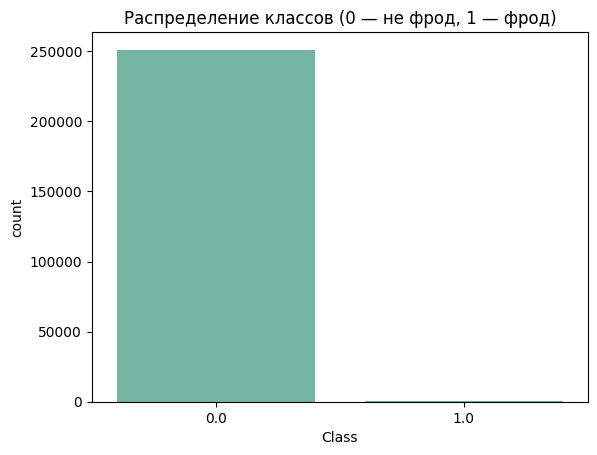

In [ ]:
sns.countplot(data = df, x = 'Class')
plt.title('Распределение классов (0 — не фрод, 1 — фрод)')
plt.show()

# **1. Распределения признаков**

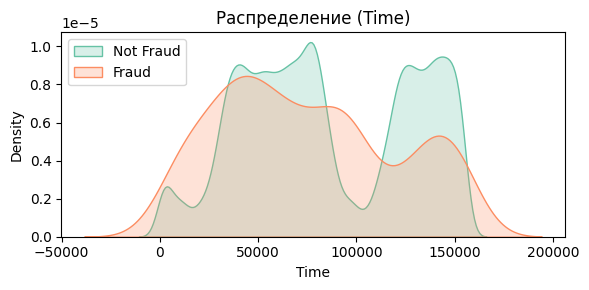

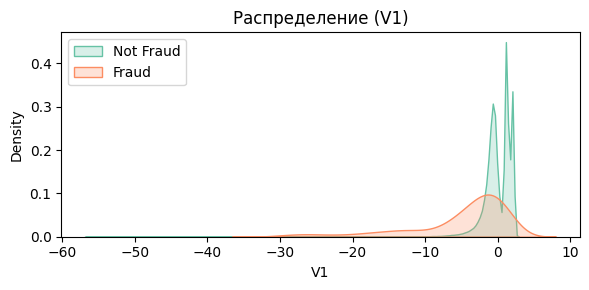

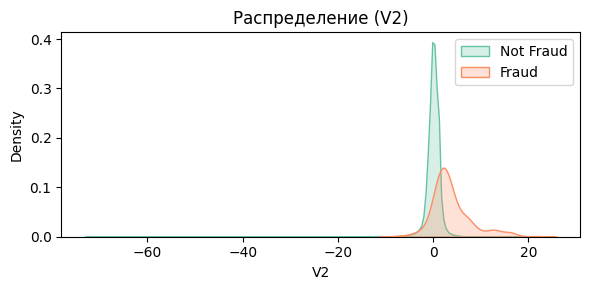

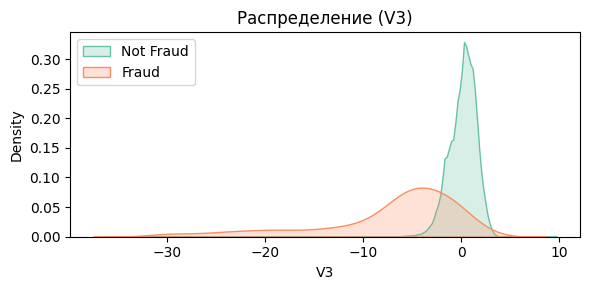

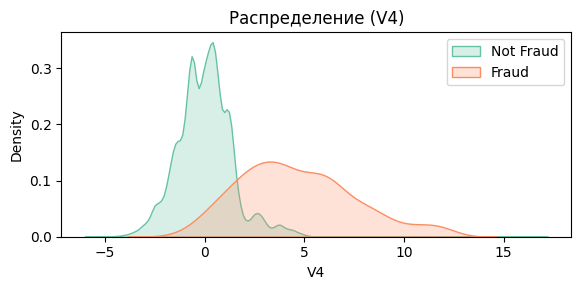

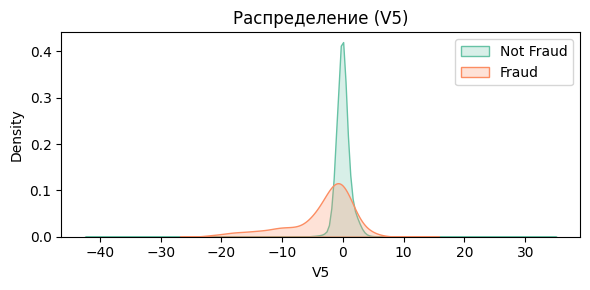

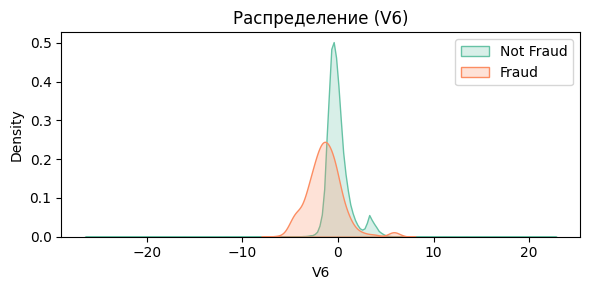

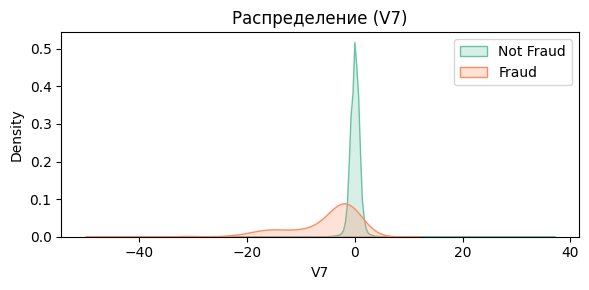

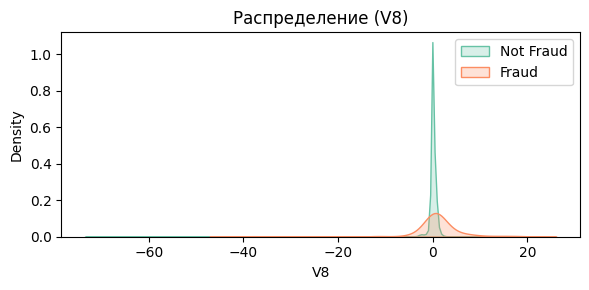

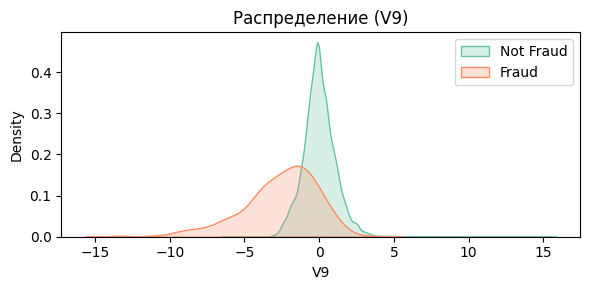

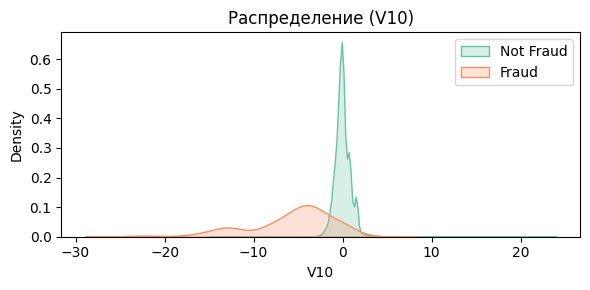

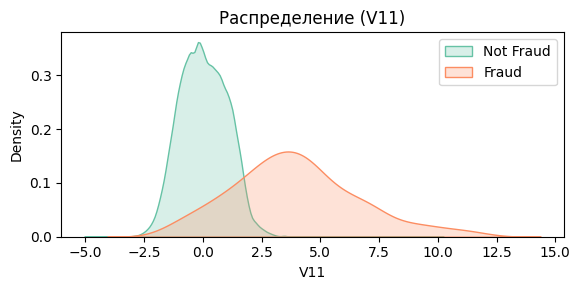

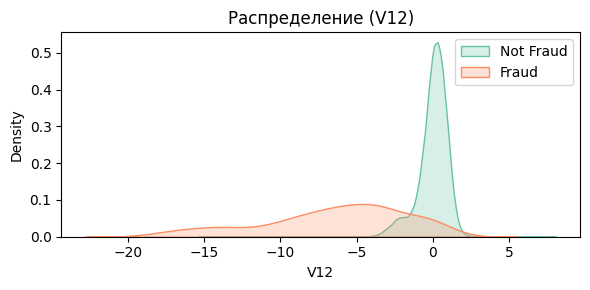

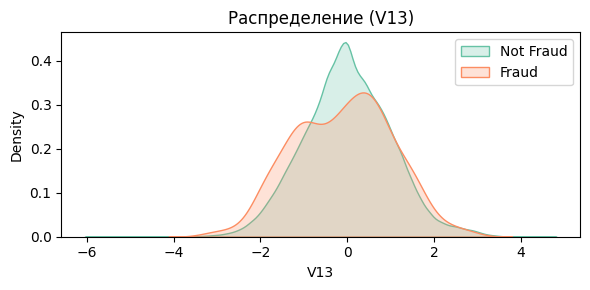

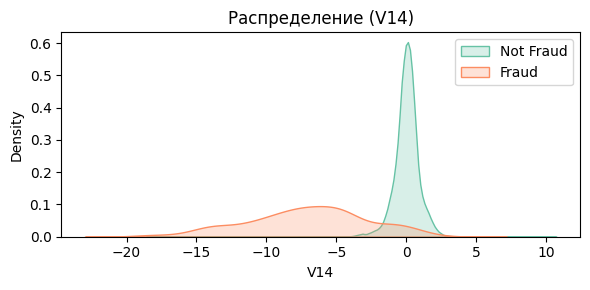

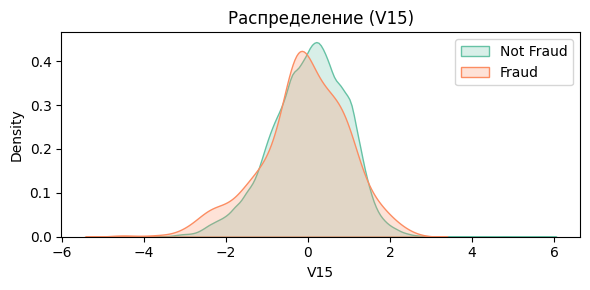

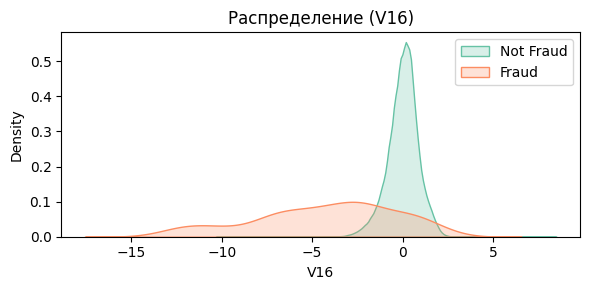

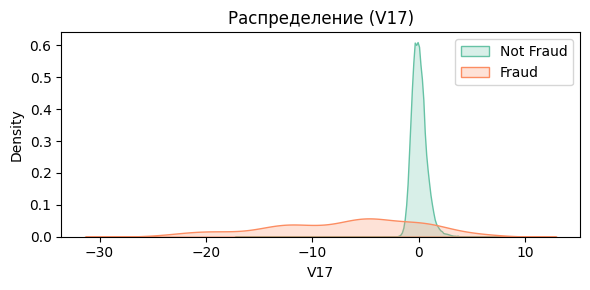

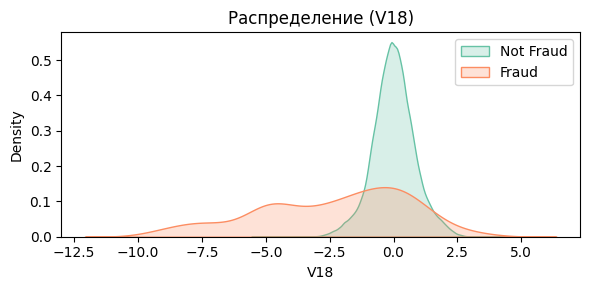

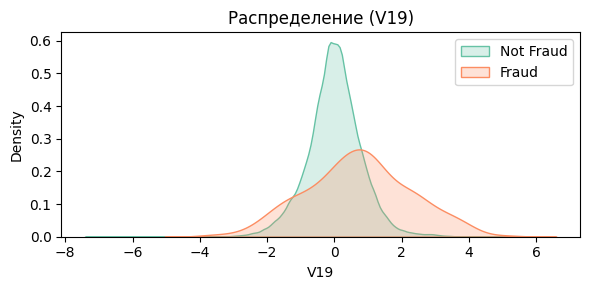

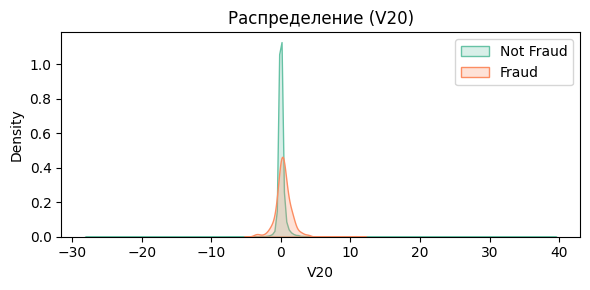

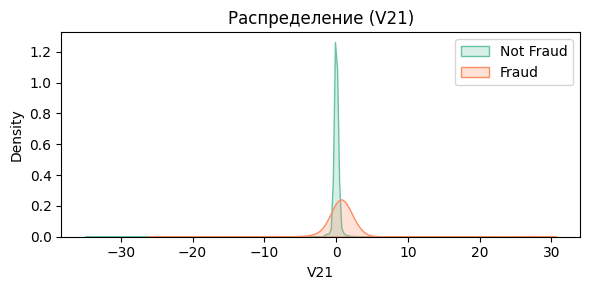

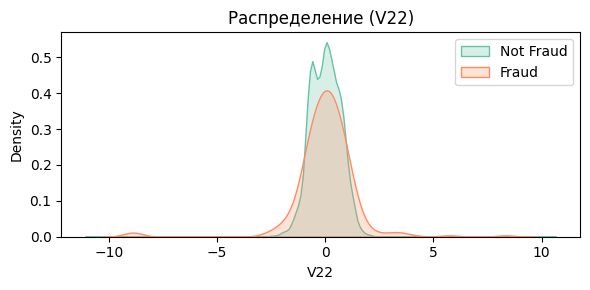

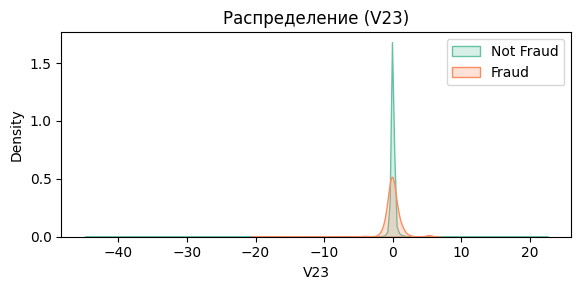

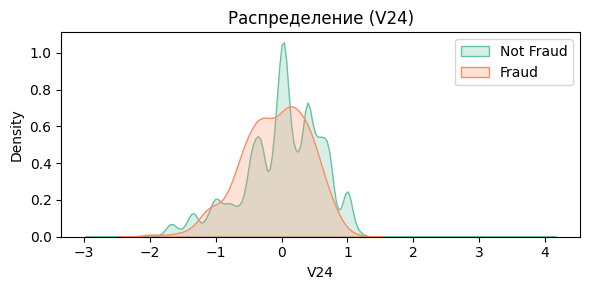

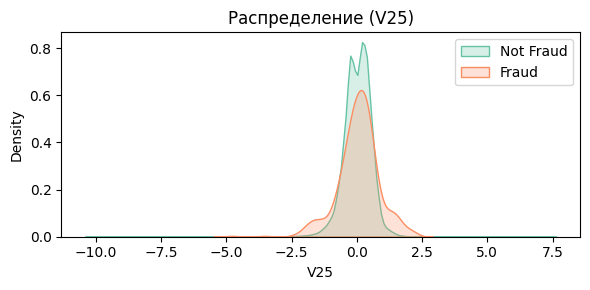

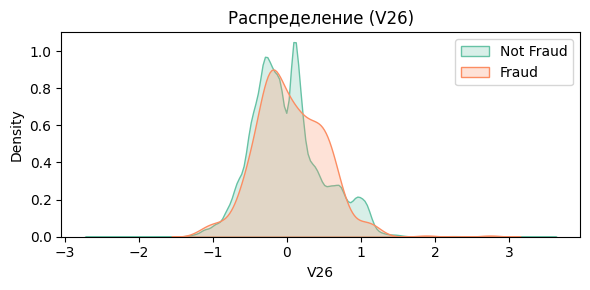

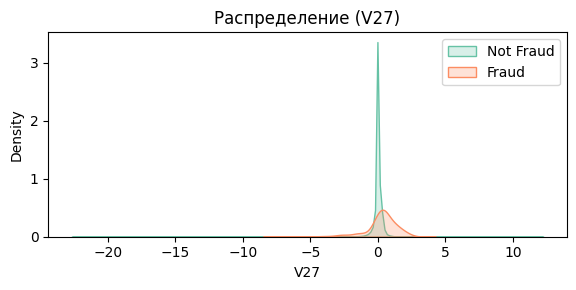

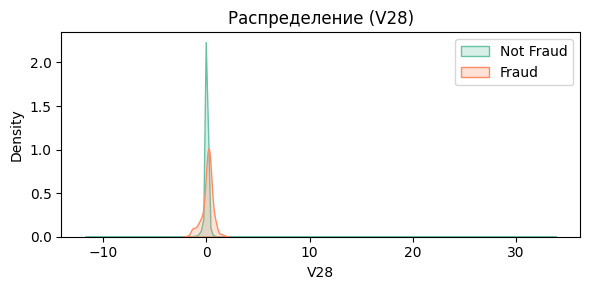

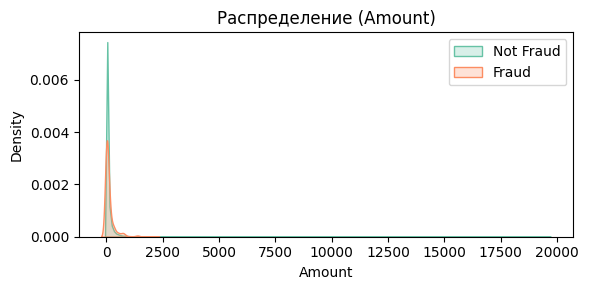

In [ ]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

for col in df.columns[:-1]:
  plt.figure(figsize = (6, 3))
  sns.kdeplot(non_fraud[col], label = 'Not Fraud', fill = True)
  sns.kdeplot(fraud[col], label = 'Fraud', fill =True)
  plt.title(f'Распределение ({col})')
  plt.legend()
  plt.tight_layout()
  plt.show()

# **2. Корреляция признаков**

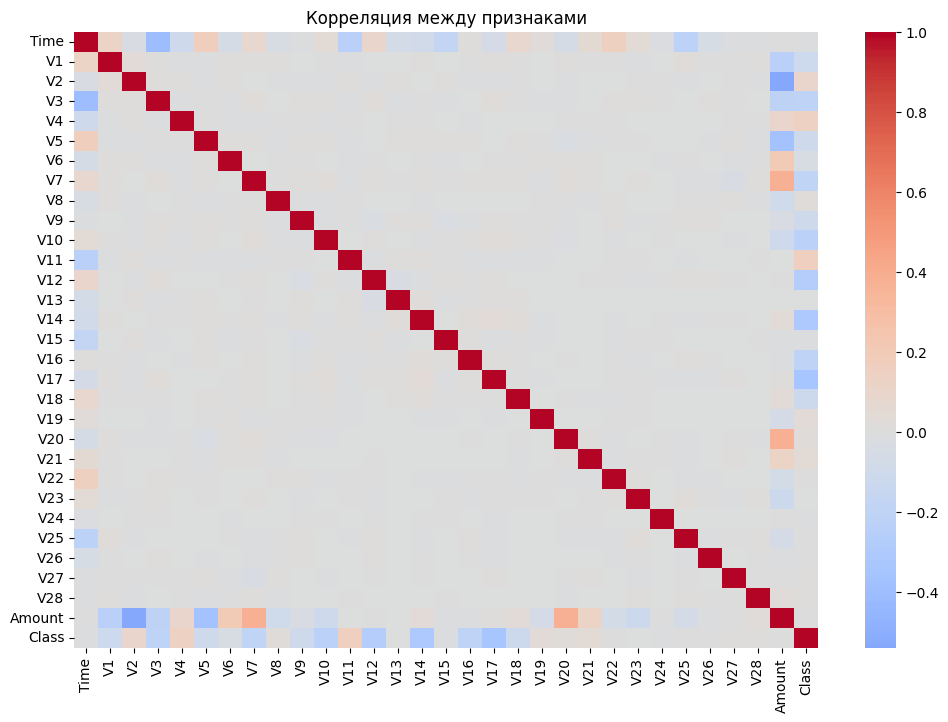

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', center = 0)
plt.title("Корреляция между признаками")
plt.show()

# **3. Анализ суммы транзакций (Amount)**

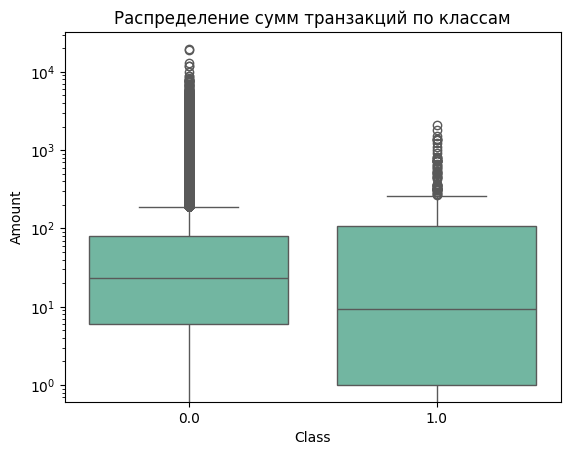

In [ ]:
sns.boxplot(data = df, x = 'Class', y = 'Amount')
plt.title('Распределение сумм транзакций по классам')
plt.yscale('log') # потому что выбросы
plt.show()

# **4. Временные паттерны (Time)**

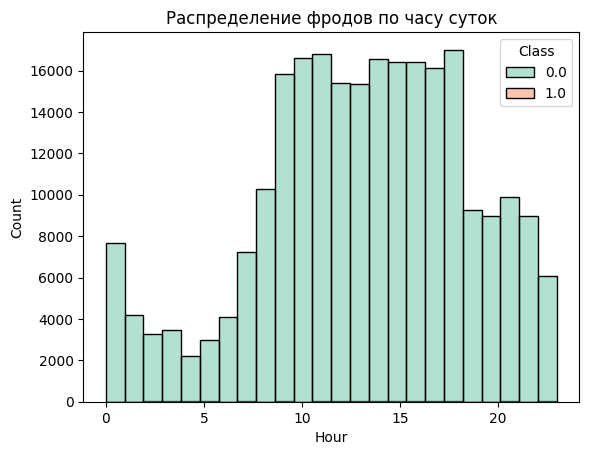

In [ ]:
df['Hour'] = df['Time'] //3600 %24 #перевод в часы
sns.histplot(data=df, x='Hour', hue='Class', bins=24, kde=False)
plt.title('Распределение фродов по часу суток')
plt.show()


## 🧾 Выводы по результатам EDA

На основе проведённого анализа можно сделать следующие наблюдения:

1. **Сильный дисбаланс классов**  
   Класс `1` (мошенничество) встречается менее чем в 0.2% случаев. Это означает, что:
   - обычные метрики, вроде accuracy, неприменимы,
   - необходимо использовать балансировку (например, SMOTE),
   - стоит фокусироваться на метриках: ROC-AUC, Recall, Precision.

2. **Распределения признаков V1–V28**  
   Некоторые признаки, такие как `V4`, `V10`, `V14`, показывают значительные различия между фродом и нефродом. Это может означать, что они хорошо разделяют классы.

3. **Признак Amount (сумма транзакции)**  
   Мошеннические транзакции не всегда связаны с большими суммами. Есть как мелкие, так и крупные операции. Тем не менее, распределения слегка различаются.

4. **Временные паттерны (признак Time)**  
   Анализ по часам суток показывает, что мошенничество может быть чуть более распространено в определённые периоды (например, ночью), но явных пиков не обнаружено.

5. **Корреляция**  
   Между признаками наблюдается небольшая корреляция. Некоторые группы V-признаков коррелируют между собой, что стоит учитывать при построении модели (например, избегать мультиколлинеарности).


